In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
samp=pd.read_csv('US_honey_dataset.csv')

In [21]:
samp

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [28]:
#dropping gthe unwanted columns from datasets.....


dis=samp.drop(['Unnamed: 0'],axis=1)

In [30]:
#getting all the columns and rows and datatypes of datasets....


dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [43]:
dis

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [32]:
#checking for null data from dadatsets....


dis.isna().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [36]:
#checking for duplicatee data from datasets.....


dis.duplicated().sum()

0

In [39]:
#checking the data of year.....


dis['year'].nunique()

27

In [42]:
#checking rarely contributing honey state....
# question 1....


dis['state'].value_counts()

state
Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: count, dtype: int64

In [60]:
#groupping by states.....


stat=dis.groupby('state').sum().reset_index()

In [61]:
stat

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,288000,1615,14467000,2987000,4057.61,28668000,54216
1,Arizona,854000,1490,38844000,17758000,2978.77,59772000,54216
2,Arkansas,908000,1886,51846000,20897000,2870.45,73781000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
4,Colorado,799000,1520,32660000,18695000,3200.56,63844000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
6,Georgia,1917000,1354,57426000,9932000,3260.68,145945000,54216
7,Hawaii,296000,2802,15420000,3508000,3719.13,49888000,54216
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000,54216
9,Illinois,236000,1562,9864000,4957000,5842.43,36782000,54216


In [80]:
# question 2.....


top5=stat.sort_values('production',ascending=False)

In [84]:
top5

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
28,NorthDakota,10710000,2266,513742000,206707000,2863.08,1186219000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
34,SouthDakota,6639000,1950,355726000,218634000,2891.51,619095000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
21,Montana,3725000,2148,197173000,91240000,2961.17,406563000,54216
18,Minnesota,3498000,1885,176581000,51908000,2887.89,310462000,54216
36,Texas,2876000,1921,129441000,41022000,2965.74,284720000,54216
17,Michigan,2168000,1753,101063000,58401000,3311.97,217841000,54216
42,Wisconsin,1698000,1896,99909000,59166000,3410.87,176442000,54216
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000,54216


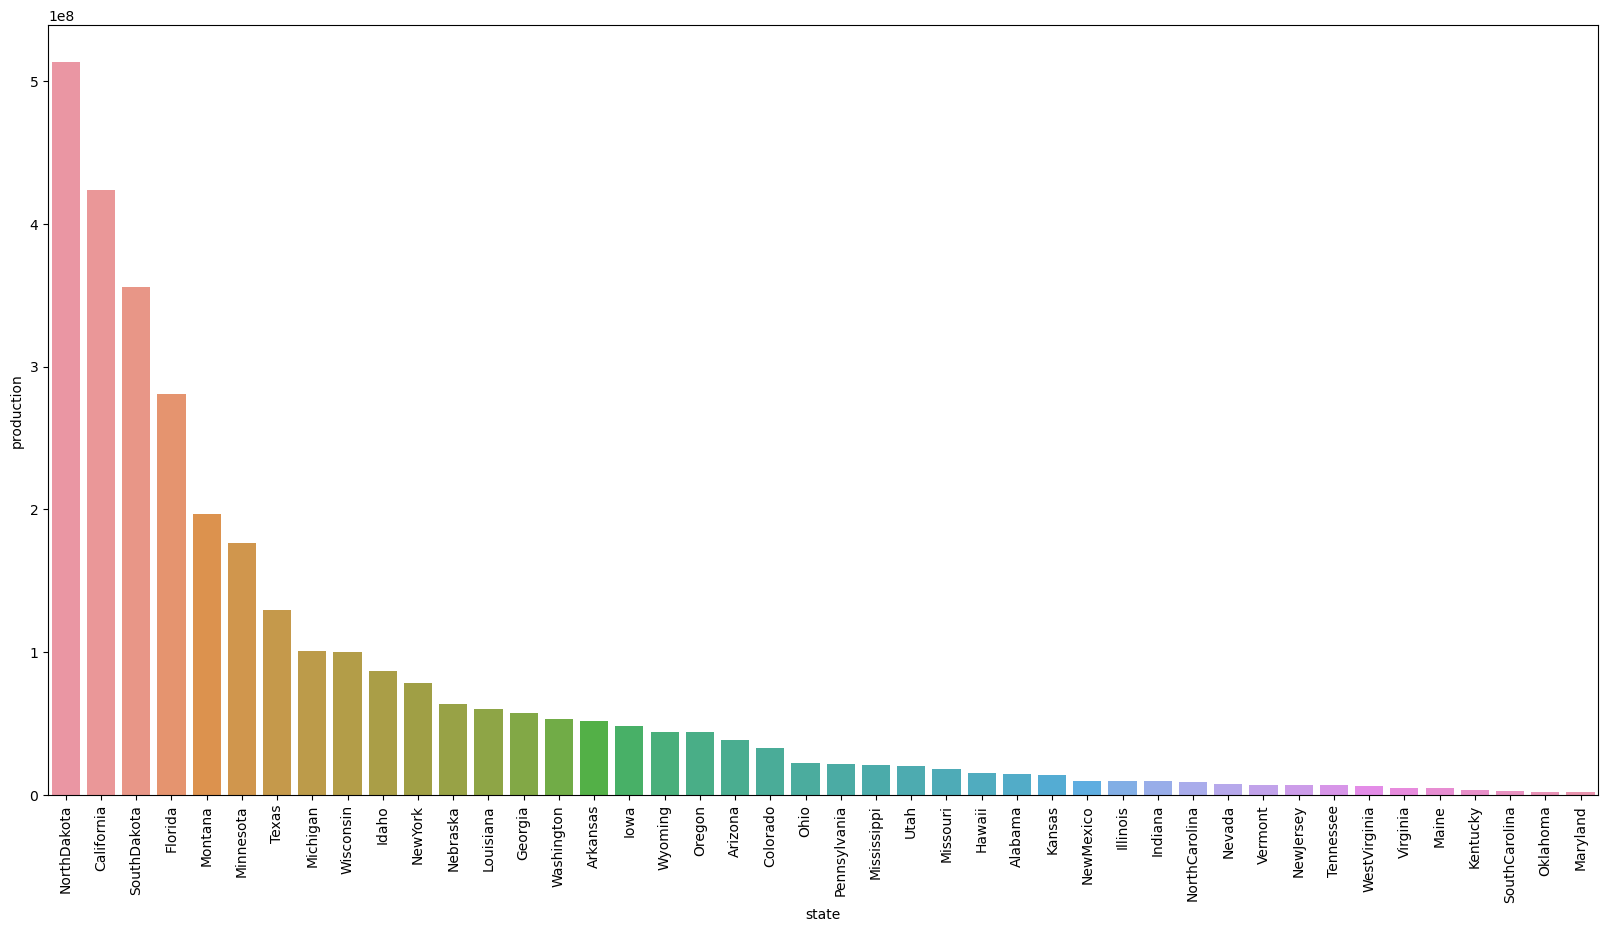

In [82]:
plt.subplots(figsize=(20,10))
sns.barplot(x=top5['state'],y=top5['production'])
plt.xticks(rotation=90)
plt.show()

In [97]:
#  question 3.....


dis.groupby('year')['average_price'].mean().reset_index()

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581
5,2000,79.023256
6,2001,88.465116
7,2002,133.204545
8,2003,151.068182
9,2004,132.350000


In [116]:
# question 4.....


high=dis.groupby('year').sum()['production'].reset_index().sort_values('production',ascending=False)

In [117]:
high

,year,production
5,2000,220320000
3,1998,219321000
0,1995,210272000
4,1999,204585000
1,1996,197995000
2,1997,191176000
6,2001,185403000
9,2004,182379000
8,2003,180741000
10,2005,173857000


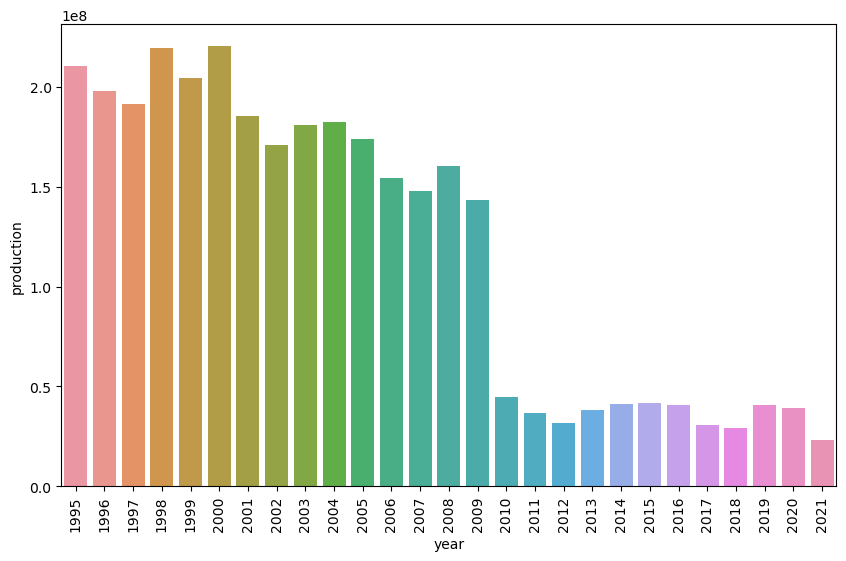

In [118]:
plt.subplots(figsize=(10,6))
sns.barplot(x=high['year'],y=high['production'])
plt.xticks(rotation=90)
plt.show()

In [121]:
# question 5....


data=dis[dis['year']==2000]

In [133]:
data

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
223,Georgia,55000,57,3135000,376000,63.0,1975000,2000
224,Hawaii,7000,112,784000,125000,81.0,635000,2000
225,Idaho,100000,47,4700000,2679000,52.0,2444000,2000
226,Illinois,8000,61,488000,146000,117.0,571000,2000


In [135]:
data.sort_values('production',ascending=False)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
245,NorthDakota,290000,115,33350000,13340000,56.0,18676000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
250,SouthDakota,235000,121,28435000,12796000,57.0,16208000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
235,Minnesota,150000,90,13500000,3105000,57.0,7695000,2000
238,Montana,148000,86,12728000,5982000,59.0,7510000,2000
252,Texas,105000,79,8295000,2986000,57.0,4728000,2000
258,Wisconsin,84000,90,7560000,4385000,68.0,5141000,2000
234,Michigan,72000,75,5400000,2970000,60.0,3240000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000


In [139]:
# question 6.....


data.sort_values('colonies_number',ascending=False).reset_index()

,index,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,220,California,440000,70,30800000,11396000,58.0,17864000,2000
1,245,NorthDakota,290000,115,33350000,13340000,56.0,18676000,2000
2,250,SouthDakota,235000,121,28435000,12796000,57.0,16208000,2000
3,222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
4,235,Minnesota,150000,90,13500000,3105000,57.0,7695000,2000
5,238,Montana,148000,86,12728000,5982000,59.0,7510000,2000
6,252,Texas,105000,79,8295000,2986000,57.0,4728000,2000
7,225,Idaho,100000,47,4700000,2679000,52.0,2444000,2000
8,258,Wisconsin,84000,90,7560000,4385000,68.0,5141000,2000
9,234,Michigan,72000,75,5400000,2970000,60.0,3240000,2000


In [149]:
hi=data.groupby('state').sum()['colonies_number'].reset_index().sort_values('colonies_number',ascending=False)

In [150]:
hi

,state,colonies_number
3,California,440000
28,NorthDakota,290000
33,SouthDakota,235000
5,Florida,232000
18,Minnesota,150000
21,Montana,148000
35,Texas,105000
8,Idaho,100000
41,Wisconsin,84000
17,Michigan,72000
